### Stock Market Analysis

#### Goal: use pandas to get stock information, visualize different aspects of it, analyze the risk of a particular stock based on its performance history, and predict future stock prices using Monte Carlo method 

#### Basic Analysis of Stock

In [1]:
# questions:
# what was the change of stock prices over time?
# what was the daily return of the stock on average?
# what was the moving average of the various stocks?


In [2]:
# analyze the attributes of stock

In [3]:
import pandas as pd

In [4]:
from pandas import Series, DataFrame

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
sns.set_style('whitegrid')

In [9]:
%matplotlib inline

In [10]:
 import pandas_datareader.data as web

In [11]:
from datetime import datetime

In [12]:
# use datetime library to set the start and end of time

In [13]:
from __future__ import division

In [14]:
# create a list for tech stocks (tickers)
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [15]:
# set start and end time
end = datetime.now()

In [16]:
# set start time as a year ago
start = datetime(end.year-1, end.month, end.day)

In [17]:
# set stock information as dataframe
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'google', start, end)

In [18]:
# Now let's check the extracted dataframes
AAPL

Open    High     Low   Close    Volume
Date                                                
2016-06-14   97.32   98.48   96.75   97.46  31931944
2016-06-15   97.82   98.41   97.03   97.14  29445227
2016-06-16   96.45   97.75   96.07   97.55  31326815
2016-06-17   96.62   96.65   95.30   95.33  61008219
2016-06-20   96.00   96.57   95.03   95.10  34411901
2016-06-21   94.94   96.35   94.68   95.91  35546358
2016-06-22   96.25   96.89   95.35   95.55  29219122
2016-06-23   95.94   96.29   95.25   96.10  32240187
2016-06-24   92.91   94.66   92.65   93.40  75311356
2016-06-27   93.00   93.05   91.50   92.04  46622188
2016-06-28   92.90   93.66   92.14   93.59  40444914
2016-06-29   93.97   94.55   93.63   94.40  36531006
2016-06-30   94.44   95.77   94.30   95.60  35836356
2016-07-01   95.49   96.46   95.33   95.89  26026540
2016-07-05   95.39   95.40   94.46   94.99  27705210
2016-07-06   94.60   95.66   94.37   95.53  30949090
2016-07-07   95.70   96.50   95.62   95.94  25139558
2016-07-08   96.49   96.89   96.05   96.68  28912103
2016-07-11   96.75   97.65   96.73   96.98  23794945
2016-07-12   97.17   97.70   97.12   97.42  24167463
2016-07-13   97.41   97.67   96.84   96.87  25892171
2016-07-14   97.39   98.99   97.32   98.79  38918997
2016-07-15   98.92   99.30   98.50   98.78  30136990
2016-07-18   98.70  100.13   98.60   99.83  36493867
2016-07-19   99.56  100.00   99.34   99.87  23779924
2016-07-20  100.00  100.46   99.74   99.96  26275968
2016-07-21   99.83  101.00   99.13   99.43  32702028
2016-07-22   99.26   99.30   98.31   98.66  28313669
2016-07-25   98.25   98.84   96.92   97.34  40382921
2016-07-26   96.82   97.97   96.42   96.67  56239822
...            ...     ...     ...     ...       ...
2017-05-02  147.54  148.09  146.84  147.51  45352194
2017-05-03  145.59  147.49  144.27  147.06  45697034
2017-05-04  146.52  147.14  145.81  146.53  23371872
2017-05-05  146.76  148.98  146.76  148.96  27327725
2017-05-08  149.03  153.70  149.03  153.01  48752413
2017-05-09  153.87  154.88  153.45  153.99  39130363
2017-05-10  153.63  153.94  152.11  153.26  25805692
2017-05-11  152.45  154.07  152.31  153.95  27255058
2017-05-12  154.70  156.42  154.67  156.10  32527017
2017-05-15  156.01  156.65  155.05  155.70  26009719
2017-05-16  155.94  156.06  154.72  155.47  20048478
2017-05-17  153.60  154.57  149.71  150.25  50767678
2017-05-18  151.27  153.34  151.13  152.54  33568215
2017-05-19  153.38  153.98  152.63  153.06  26960788
2017-05-22  154.00  154.58  152.91  153.99  22966437
2017-05-23  154.90  154.90  153.31  153.80  19918871
2017-05-24  153.84  154.17  152.67  153.34  19219154
2017-05-25  153.73  154.35  153.03  153.87  19235598
2017-05-26  154.00  154.24  153.31  153.61  21927637
2017-05-30  153.42  154.43  153.33  153.67  20126851
2017-05-31  153.97  154.17  152.38  152.76  24451164
2017-06-01  153.17  153.33  152.22  153.18  16404088
2017-06-02  153.58  155.45  152.89  155.45  27770715
2017-06-05  154.34  154.45  153.46  153.93  25331662
2017-06-06  153.90  155.81  153.78  154.45  26624926
2017-06-07  155.02  155.98  154.48  155.37  21069647
2017-06-08  155.25  155.54  154.40  154.99  21250798
2017-06-09  155.19  155.19  146.02  148.98  64882657
2017-06-12  145.74  146.09  142.51  145.42  72307330
2017-06-13  147.16  147.45  145.15  146.59  34165445

[252 rows x 5 columns]

In [19]:
GOOG

Open    High     Low   Close   Volume
Date                                               
2016-06-14  716.48  722.47  713.12  718.27  1306065
2016-06-15  719.00  722.98  717.31  718.92  1214517
2016-06-16  714.91  716.65  703.26  710.36  1982471
2016-06-17  708.65  708.82  688.45  691.72  3402357
2016-06-20  698.77  702.48  693.41  693.71  2082538
2016-06-21  698.40  702.77  692.01  695.94  1465634
2016-06-22  699.06  700.86  693.08  697.46  1184318
2016-06-23  697.45  701.95  687.00  701.87  2171415
2016-06-24  675.17  689.40  673.45  675.22  4449022
2016-06-27  671.00  672.30  663.28  668.26  2641085
2016-06-28  678.97  680.33  673.00  680.04  2173762
2016-06-29  683.00  687.43  681.41  684.11  1932561
2016-06-30  685.47  692.32  683.65  692.10  1597714
2016-07-01  692.20  700.65  692.13  699.21  1344710
2016-07-05  696.06  696.94  688.88  694.49  1462616
2016-07-06  689.98  701.68  689.09  697.77  1411925
2016-07-07  698.08  698.20  688.22  695.36  1304200
2016-07-08  699.50  705.71  696.44  705.63  1575166
2016-07-11  708.05  716.51  707.24  715.09  1111762
2016-07-12  719.12  722.94  715.91  720.64  1336921
2016-07-13  723.62  724.00  716.85  716.98   935876
2016-07-14  721.58  722.21  718.03  720.95   950193
2016-07-15  725.73  725.74  719.06  719.85  1279339
2016-07-18  722.71  736.13  721.19  733.78  1295476
2016-07-19  729.89  736.99  729.00  736.96  1227486
2016-07-20  737.33  742.13  737.10  741.19  1289671
2016-07-21  740.36  741.69  735.83  738.63  1026306
2016-07-22  741.86  743.24  736.56  742.74  1259823
2016-07-25  740.67  742.61  737.50  739.77  1032432
2016-07-26  739.04  741.69  734.27  738.42  1186738
...            ...     ...     ...     ...      ...
2017-05-02  909.62  920.77  909.45  916.44  1587219
2017-05-03  914.86  928.10  912.54  927.04  1499532
2017-05-04  926.07  935.93  924.59  931.66  1422144
2017-05-05  933.54  934.90  925.20  927.13  1911275
2017-05-08  926.12  936.92  925.26  934.30  1329825
2017-05-09  936.95  937.50  929.53  932.17  1581809
2017-05-10  931.98  932.00  925.16  928.78  1173925
2017-05-11  925.32  932.53  923.03  930.60   835386
2017-05-12  931.53  933.44  927.85  932.22  1050601
2017-05-15  932.95  938.25  929.34  937.08  1108496
2017-05-16  940.00  943.11  937.58  943.00   969479
2017-05-17  935.67  939.33  918.14  919.62  2362072
2017-05-18  921.00  933.17  918.75  930.24  1596897
2017-05-19  931.47  937.76  931.00  934.01  1393024
2017-05-22  935.00  941.88  935.00  941.86  1120385
2017-05-23  947.92  951.47  942.58  948.82  1270817
2017-05-24  952.98  955.09  949.50  954.96  1034199
2017-05-25  957.33  972.63  955.47  969.54  1660474
2017-05-26  969.70  974.98  965.03  971.47  1252010
2017-05-30  970.31  976.20  969.49  975.88  1466654
2017-05-31  975.02  979.27  960.18  964.86  2448067
2017-06-01  968.95  971.50  960.01  966.95  1410458
2017-06-02  969.46  975.88  966.00  975.60  1750955
2017-06-05  976.55  986.91  975.10  983.68  1252106
2017-06-06  983.16  988.25  975.14  976.57  1814624
2017-06-07  979.65  984.15  975.77  981.08  1453874
2017-06-08  982.35  984.57  977.20  983.41  1481916
2017-06-09  984.50  984.50  935.63  949.83  3309389
2017-06-12  939.56  949.36  915.23  942.90  3763529
2017-06-13  951.91  959.98  944.09  953.40  2013337

[252 rows x 5 columns]

In [20]:
MSFT

Open   High    Low  Close     Volume
Date                                             
2016-06-14  49.90  50.10  49.57  49.83   42577106
2016-06-15  49.78  50.12  49.69  49.69   33757639
2016-06-16  49.52  50.47  49.51  50.39   31188605
2016-06-17  50.41  50.43  49.82  50.13   45710516
2016-06-20  50.64  50.83  50.03  50.07   35607946
2016-06-21  50.20  51.43  50.16  51.19   34097825
2016-06-22  51.08  51.46  50.95  50.99   28816848
2016-06-23  51.28  52.06  51.15  51.91   29028833
2016-06-24  49.81  50.94  49.52  49.83  133502985
2016-06-27  49.10  49.15  48.04  48.43   50576699
2016-06-28  48.92  49.47  48.67  49.44   38140658
2016-06-29  49.91  50.72  49.80  50.54   31304021
2016-06-30  50.72  51.30  50.50  51.17   28527781
2016-07-01  51.13  51.72  51.07  51.16   21400392
2016-07-05  50.83  51.28  50.74  51.17   24806351
2016-07-06  50.78  51.54  50.39  51.38   28167461
2016-07-07  51.42  51.61  51.07  51.38   19585194
2016-07-08  51.73  52.36  51.55  52.30   28391026
2016-07-11  52.50  52.83  52.47  52.59   22269203
2016-07-12  52.94  53.40  52.78  53.21   27317555
2016-07-13  53.56  53.86  53.18  53.51   25356841
2016-07-14  53.84  53.99  53.58  53.74   24545520
2016-07-15  53.95  54.00  53.21  53.70   32024385
2016-07-18  53.70  54.34  53.55  53.96   31433864
2016-07-19  53.71  53.90  52.93  53.09   53336533
2016-07-20  56.15  56.84  55.53  55.91   89893301
2016-07-21  55.98  56.23  55.76  55.80   32776653
2016-07-22  56.08  56.63  55.78  56.57   32157167
2016-07-25  56.47  56.74  56.26  56.73   25610587
2016-07-26  56.52  57.29  56.51  56.76   28078995
...           ...    ...    ...    ...        ...
2017-05-02  69.71  69.71  69.13  69.30   23906119
2017-05-03  69.38  69.38  68.71  69.08   28927973
2017-05-04  69.03  69.08  68.64  68.81   21749409
2017-05-05  68.90  69.03  68.48  69.00   19128782
2017-05-08  68.97  69.05  68.42  68.94   18566087
2017-05-09  68.86  69.28  68.68  69.04   22858414
2017-05-10  68.99  69.56  68.92  69.31   17977830
2017-05-11  68.36  68.73  68.12  68.46   28789413
2017-05-12  68.61  68.61  68.04  68.38   18714123
2017-05-15  68.14  68.48  67.57  68.43   31530301
2017-05-16  68.23  69.44  68.16  69.41   34956038
2017-05-17  68.89  69.10  67.43  67.48   30548781
2017-05-18  67.40  68.13  67.14  67.71   25201274
2017-05-19  67.50  68.10  67.43  67.69   26961119
2017-05-22  67.89  68.50  67.50  68.45   16237550
2017-05-23  68.72  68.75  68.38  68.68   15425824
2017-05-24  68.87  68.88  68.45  68.77   14666865
2017-05-25  68.97  69.88  68.91  69.62   21854095
2017-05-26  69.80  70.22  69.52  69.96   19827923
2017-05-30  69.79  70.41  69.77  70.41   17072838
2017-05-31  70.53  70.74  69.81  69.84   30436364
2017-06-01  70.24  70.61  69.45  70.10   21603601
2017-06-02  70.44  71.86  70.24  71.76   34770261
2017-06-05  71.97  72.89  71.81  72.28   33316760
2017-06-06  72.30  72.62  72.27  72.52   31511065
2017-06-07  72.64  72.77  71.95  72.39   22301765
2017-06-08  72.51  72.52  71.50  71.95   24588270
2017-06-09  72.04  72.08  68.59  70.32   49187396
2017-06-12  69.25  69.94  68.13  69.78   47761743
2017-06-13  70.02  70.82  69.96  70.65   25258614

[252 rows x 5 columns]

In [21]:
AMZN

Open     High      Low    Close   Volume
Date                                                   
2016-06-14   712.33   720.80   712.27   719.30  2506922
2016-06-15   722.00   722.56   713.35   714.26  2709447
2016-06-16   712.05   718.00   705.30   717.51  3097961
2016-06-17   718.19   718.20   699.18   706.39  5897788
2016-06-20   713.50   721.31   710.81   714.01  3677162
2016-06-21   715.72   718.40   712.72   715.82  2137534
2016-06-22   716.58   717.00   707.56   710.60  2260454
2016-06-23   715.50   722.12   712.50   722.08  2824974
2016-06-24   693.00   712.53   692.20   698.96  7632511
2016-06-27   692.01   696.82   682.12   691.36  5584037
2016-06-28   700.00   708.00   698.17   707.95  4036957
2016-06-29   715.75   719.50   713.54   715.60  3070052
2016-06-30   717.20   719.37   712.54   715.62  2855142
2016-07-01   717.32   728.00   716.54   725.68  2920423
2016-07-05   722.80   728.11   719.61   728.10  2431431
2016-07-06   725.71   737.77   722.58   737.61  3938249
2016-07-07   739.33   739.55   731.63   736.57  2945783
2016-07-08   740.14   746.10   738.00   745.81  3429217
2016-07-11   750.00   755.90   747.00   753.78  3195272
2016-07-12   756.86   757.34   740.33   748.21  5623657
2016-07-13   746.76   756.87   741.25   742.63  4142265
2016-07-14   748.86   749.04   739.02   741.20  2390472
2016-07-15   746.55   746.55   734.05   735.44  3121385
2016-07-18   735.49   741.60   728.72   736.07  2954914
2016-07-19   732.50   743.33   732.31   739.95  2216820
2016-07-20   744.00   746.25   740.70   745.72  2214023
2016-07-21   747.50   749.36   742.79   744.43  2317072
2016-07-22   747.79   751.28   743.53   744.86  2277711
2016-07-25   746.55   748.50   735.35   739.61  2679290
2016-07-26   742.71   743.13   732.75   735.59  2529692
...             ...      ...      ...      ...      ...
2017-05-02   946.64   950.10   941.41   946.94  3848835
2017-05-03   946.00   946.00   935.90   941.03  3582686
2017-05-04   944.75   945.00   934.22   937.53  2418381
2017-05-05   940.52   940.79   930.30   934.15  2866397
2017-05-08   940.95   949.05   939.21   949.04  3415731
2017-05-09   952.80   957.89   950.20   952.82  3262113
2017-05-10   953.50   953.75   945.00   948.95  2096512
2017-05-11   945.11   950.29   940.78   947.62  2194070
2017-05-12   954.50   962.79   951.53   961.35  3625857
2017-05-15   958.73   963.15   956.06   957.97  4270625
2017-05-16   961.00   970.06   960.91   966.07  3126051
2017-05-17   954.70   960.40   944.12   944.76  5145578
2017-05-18   944.80   962.75   944.76   958.49  3939347
2017-05-19   962.84   968.92   959.72   959.84  3972089
2017-05-22   964.00   971.38   962.90   970.67  2642217
2017-05-23   975.02   975.20   966.85   971.54  2415594
2017-05-24   976.00   981.00   970.23   980.35  2463052
2017-05-25   984.85   999.00   982.11   993.38  4822032
2017-05-26   995.00   998.65   989.25   995.78  3469154
2017-05-30   996.51  1001.20   995.52   996.70  3263069
2017-05-31  1000.00  1000.12   982.16   994.62  3913115
2017-06-01   998.59   998.99   991.37   995.95  2454841
2017-06-02   998.99  1008.48   995.67  1006.73  3752328
2017-06-05  1007.23  1013.21  1003.51  1011.34  2719859
2017-06-06  1012.00  1016.50  1001.25  1003.00  3346432
2017-06-07  1005.95  1010.25  1002.00  1010.07  2823041
2017-06-08  1012.06  1013.61  1006.11  1010.27  2767857
2017-06-09  1012.50  1012.99   927.00   978.31  7647692
2017-06-12   967.00   975.95   945.00   964.91  9447233
2017-06-13   977.99   984.50   966.10   980.79  4580011

[252 rows x 5 columns]

In [22]:
# Now we have 4 stock dataframes containing price information by date: opening, high, low, closing, and adjusted closing prices 
# and volume
AAPL.describe()

Open        High         Low       Close        Volume
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean   121.887897  122.728452  121.189603  122.052103  3.118854e+07
std     18.022977   18.017412   17.918709   17.988117  1.442191e+07
min     92.900000   93.050000   91.500000   92.040000  1.147592e+07
25%    108.680000  109.497500  108.040000  108.847500  2.299466e+07
50%    116.460000  117.010000  115.735000  116.560000  2.714010e+07
75%    139.395000  140.397500  138.825000  139.802500  3.441889e+07
max    156.010000  156.650000  155.050000  156.100000  1.123403e+08

In [23]:
GOOG.describe()

Open        High         Low       Close        Volume
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean   805.190040  810.050873  800.174246  805.526032  1.542665e+06
std     66.320513   66.515582   66.019967   66.497026  6.798506e+05
min    671.000000  672.300000  663.280000  668.260000  5.874210e+05
25%    769.990000  774.492500  765.732500  769.615000  1.108902e+06
50%    791.765000  796.770000  786.685000  791.405000  1.357586e+06
75%    828.880000  833.420000  825.927500  830.502500  1.707230e+06
max    984.500000  988.250000  977.200000  983.680000  4.745183e+06

In [24]:
MSFT.describe()

Open        High         Low       Close        Volume
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean    61.254286   61.631310   60.866071   61.285833  2.623136e+07
std      5.265215    5.240892    5.211091    5.239984  1.216731e+07
min     48.920000   49.150000   48.040000   48.430000  8.409616e+06
25%     57.592500   57.835000   57.260000   57.600000  1.952206e+07
50%     61.560000   62.145000   61.420000   62.055000  2.292773e+07
75%     64.910000   65.205000   64.457500   64.885000  3.022078e+07
max     72.640000   72.890000   72.270000   72.520000  1.335030e+08

In [25]:
AMZN.describe()

Open         High          Low        Close        Volume
count   252.000000   252.000000   252.000000   252.000000  2.520000e+02
mean    819.733849   824.871071   813.549960   819.729286  3.521873e+06
std      75.922456    75.973164    75.457412    75.897910  1.644741e+06
min     692.010000   696.820000   682.120000   691.360000  1.458834e+06
25%     764.000000   768.412500   757.902500   762.502500  2.501428e+06
50%     804.925000   812.620000   802.560000   807.985000  3.115232e+06
75%     852.090000   854.997500   847.662500   852.477500  3.938524e+06
max    1012.500000  1016.500000  1006.110000  1011.340000  1.274699e+07

In [26]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-06-14 to 2017-06-13
Data columns (total 5 columns):
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null float64
Volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [27]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-06-14 to 2017-06-13
Data columns (total 5 columns):
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null float64
Volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [28]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-06-14 to 2017-06-13
Data columns (total 5 columns):
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null float64
Volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [29]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-06-14 to 2017-06-13
Data columns (total 5 columns):
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null float64
Volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


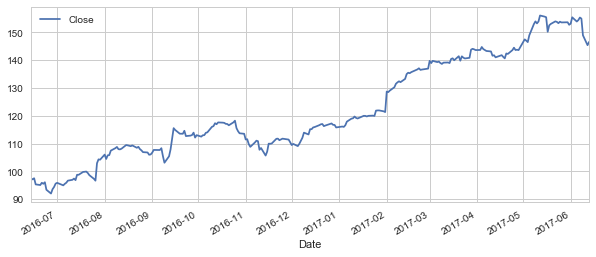

In [30]:
AAPL['Close'].plot(legend = True, figsize = (10, 4)) # 10 by 4 inches

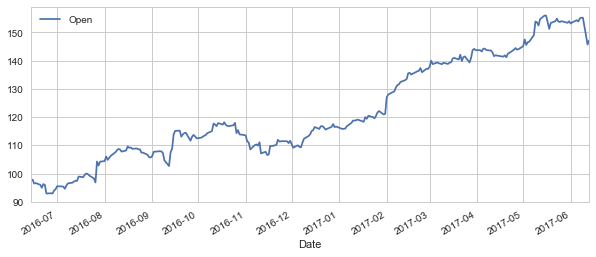

In [31]:
AAPL['Open'].plot(legend = True, figsize = (10, 4))

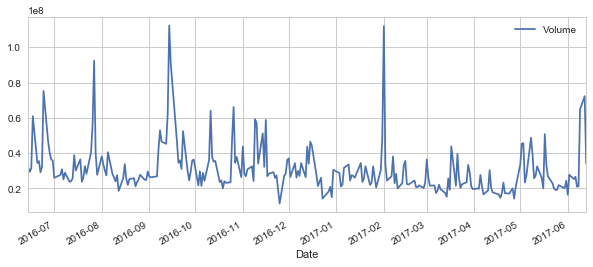

In [32]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

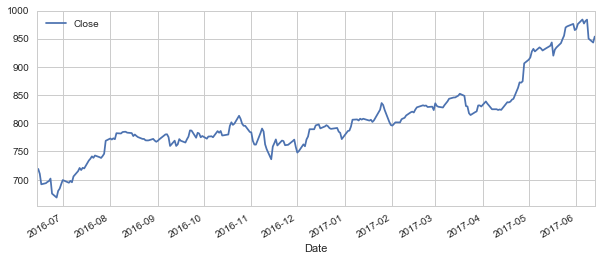

In [33]:
GOOG['Close'].plot(legend = True, figsize = (10,4))

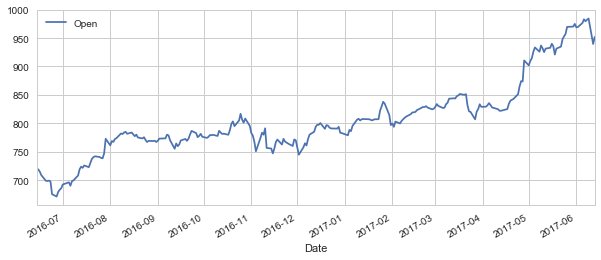

In [34]:
GOOG['Open'].plot(legend = True, figsize = (10,4))

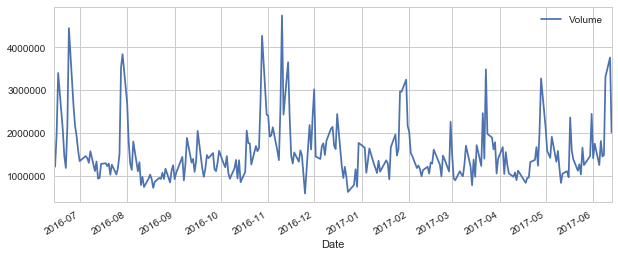

In [35]:
GOOG['Volume'].plot(legend = True, figsize = (10,4))

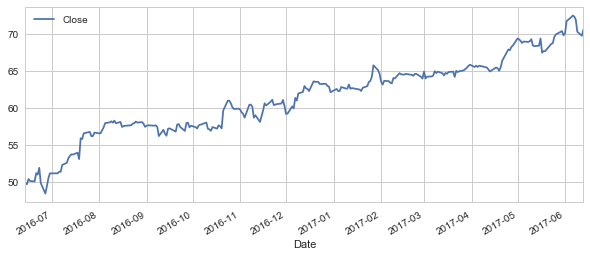

In [36]:
MSFT['Close'].plot(legend = True, figsize = (10,4))

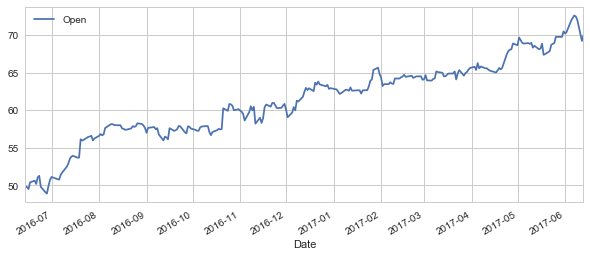

In [37]:
MSFT['Open'].plot(legend = True, figsize = (10,4))

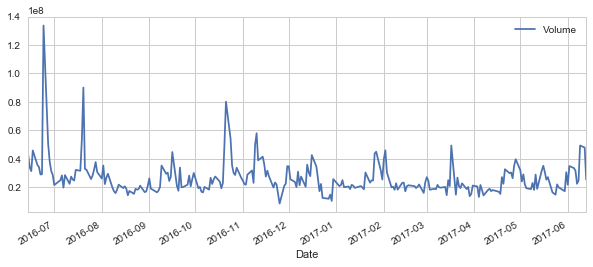

In [38]:
MSFT['Volume'].plot(legend = True, figsize = (10,4))

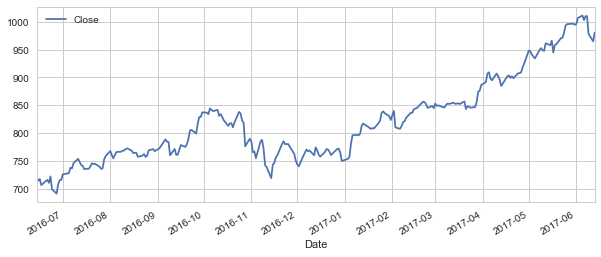

In [39]:
AMZN['Close'].plot(legend = True, figsize = (10,4))

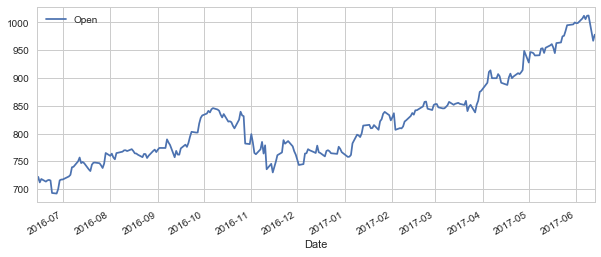

In [40]:
AMZN['Open'].plot(legend = True, figsize = (10,4))

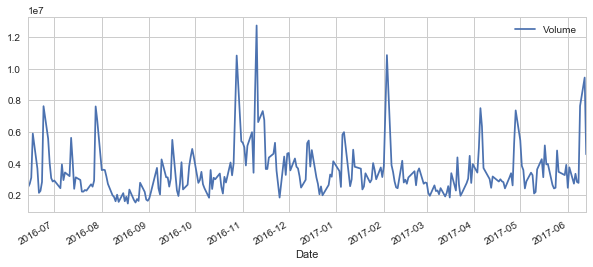

In [41]:
AMZN['Volume'].plot(legend = True, figsize = (10,4))

In [45]:
# Calculate the rolling mean (moving average) to give insights on trends in data
# in this case, calculate three 
ma_day = [20, 50, 100]

for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    AAPL[column_name]=pd.rolling_mean(AAPL['Close'], ma)

C:\Users\Shibo Wang\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\Shibo Wang\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
C:\Users\Shibo Wang\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()


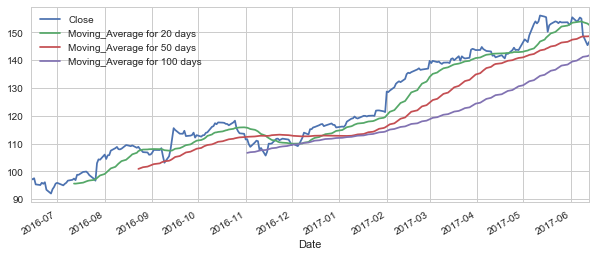

In [46]:
# plot it up
# close prices
AAPL[['Close', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

In [48]:
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    AAPL[column_name]=AAPL['Close'].rolling(window= ma,center=False).mean()

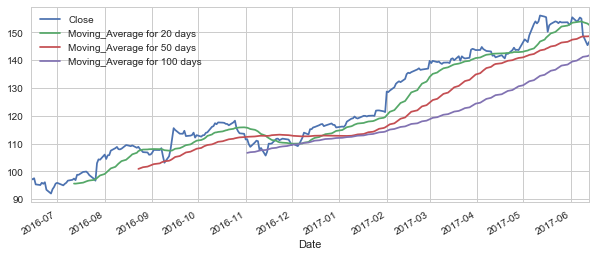

In [49]:
AAPL[['Close', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

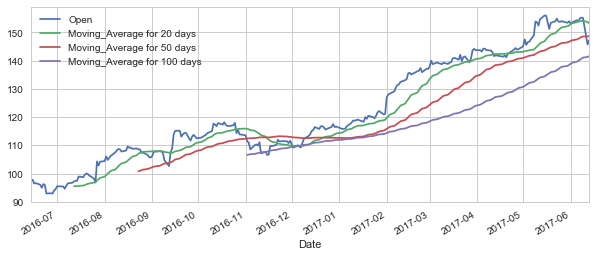

In [50]:
# open prices
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    AAPL[column_name]=AAPL['Open'].rolling(window= ma,center=False).mean()

AAPL[['Open', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

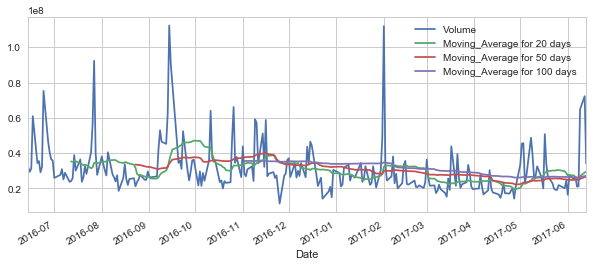

In [51]:
# trade volumes
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    AAPL[column_name]=AAPL['Volume'].rolling(window= ma,center=False).mean()

AAPL[['Volume', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

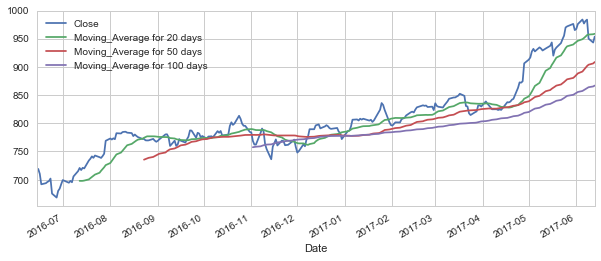

In [53]:
# close prices for GOOG
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    GOOG[column_name]=GOOG['Close'].rolling(window= ma,center=False).mean()

GOOG[['Close', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

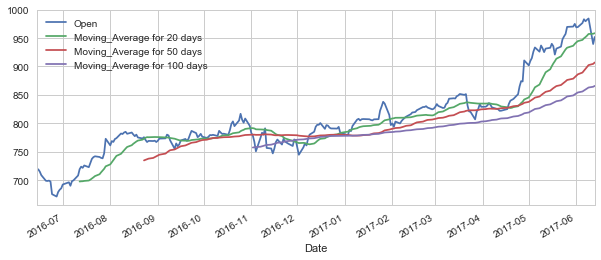

In [54]:
# Open prices for GOOG
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    GOOG[column_name]=GOOG['Open'].rolling(window= ma,center=False).mean()

GOOG[['Open', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

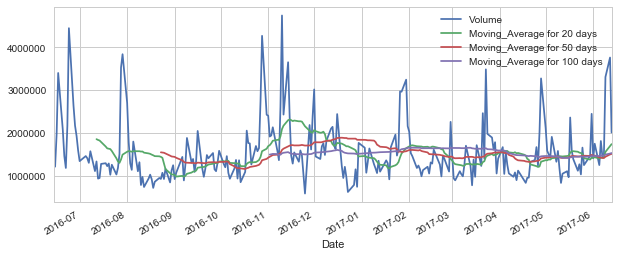

In [55]:
# trading volumes for GOOG
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    GOOG[column_name]=GOOG['Volume'].rolling(window= ma,center=False).mean()

GOOG[['Volume', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

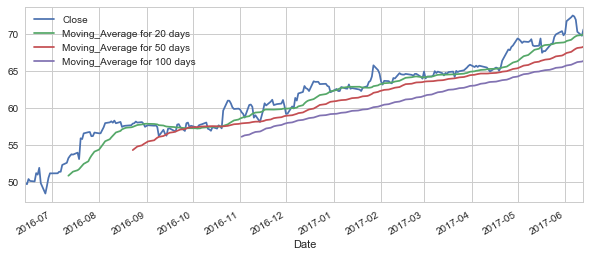

In [56]:
# close prices for MSFT
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    MSFT[column_name]=MSFT['Close'].rolling(window= ma,center=False).mean()

MSFT[['Close', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

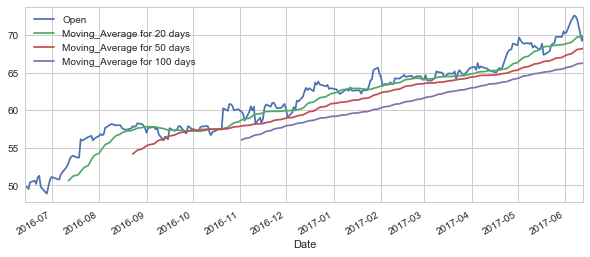

In [57]:
# Open prices for MSFT
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    MSFT[column_name]=MSFT['Open'].rolling(window= ma,center=False).mean()

MSFT[['Open', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

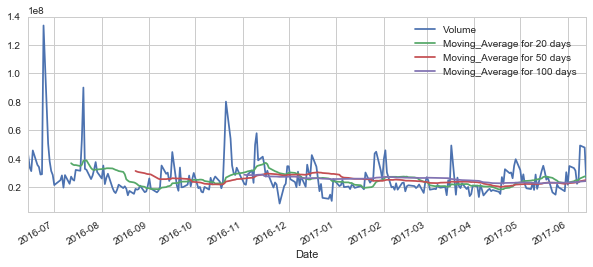

In [58]:
# trading volumes for MSFT
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    MSFT[column_name]=MSFT['Volume'].rolling(window= ma,center=False).mean()

MSFT[['Volume', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

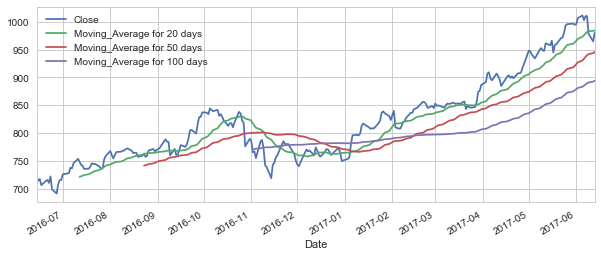

In [59]:
# close prices for AMZN
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    AMZN[column_name]=AMZN['Close'].rolling(window= ma,center=False).mean()

AMZN[['Close', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

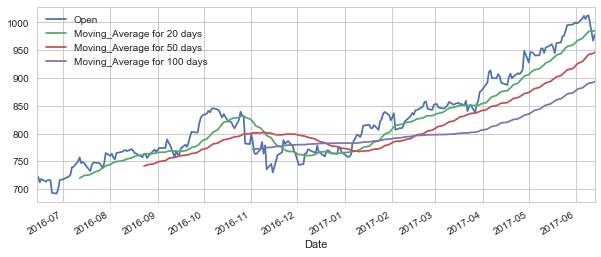

In [60]:
# Open prices for AMZN
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    AMZN[column_name]=AMZN['Open'].rolling(window= ma,center=False).mean()

AMZN[['Open', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

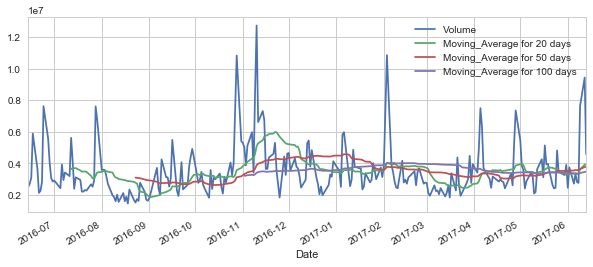

In [61]:
# trading volumes for AMZN
for ma in ma_day:
    column_name = 'Moving_Average for %s days'% (ma)
    AMZN[column_name]=AMZN['Volume'].rolling(window= ma,center=False).mean()

AMZN[['Volume', 'Moving_Average for 20 days', 'Moving_Average for 50 days', 'Moving_Average for 100 days']].plot(subplots = False, figsize =(10,4))

### Daily Return Analysis

In [62]:
# after the above baseline analysis, let's analyze the risk of the stock. First, I will get the info on daily return of the stocks

In [70]:
# for AAPL:
AAPL['Daily Return']=AAPL['Close'].pct_change()

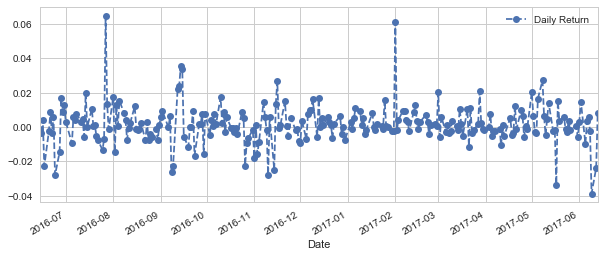

In [74]:
# plot it up:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle = '--', marker = 'o')

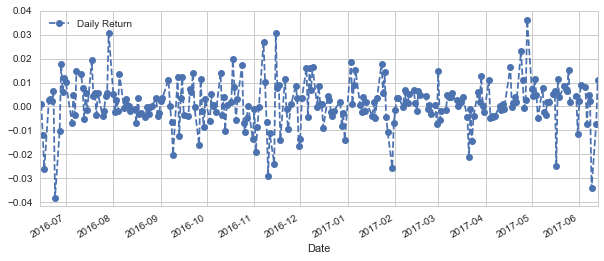

In [75]:
# do the same thing for the other stocks: GOOG
GOOG['Daily Return']=GOOG['Close'].pct_change()
GOOG['Daily Return'].plot(figsize=(10,4), legend=True, linestyle = '--', marker = 'o')

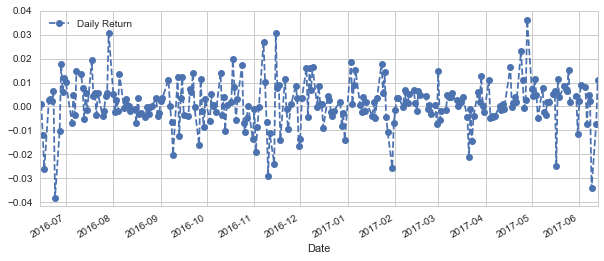

In [76]:
# do the same thing for the other stocks: MSFT
MSFT['Daily Return']=GOOG['Close'].pct_change()
MSFT['Daily Return'].plot(figsize=(10,4), legend=True, linestyle = '--', marker = 'o')

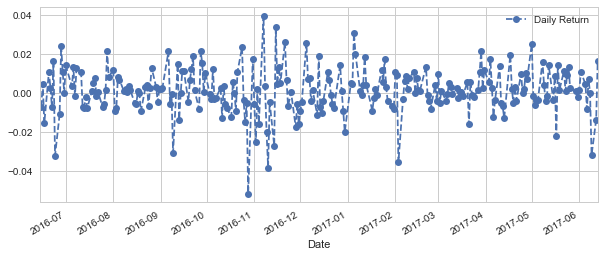

In [77]:
# do the same thing for the other stocks: AMZN
AMZN['Daily Return']=AMZN['Close'].pct_change()
AMZN['Daily Return'].plot(figsize=(10,4), legend=True, linestyle = '--', marker = 'o')

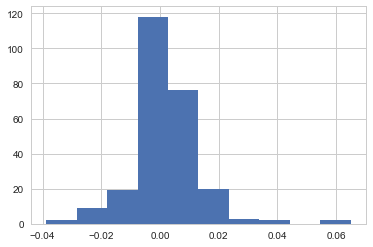

In [80]:
# do a histogram:
AAPL['Daily Return'].hist()

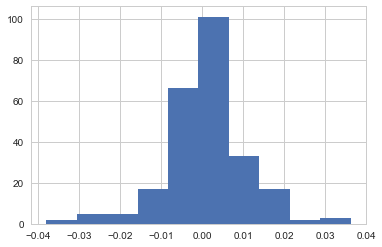

In [81]:
GOOG['Daily Return'].hist()

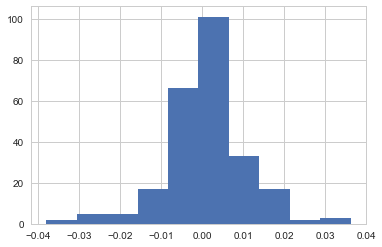

In [82]:
MSFT['Daily Return'].hist()

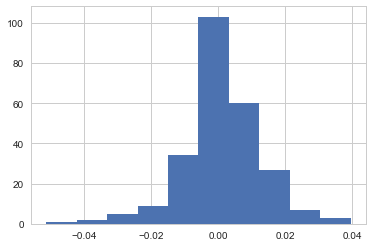

In [83]:
AMZN['Daily Return'].hist()

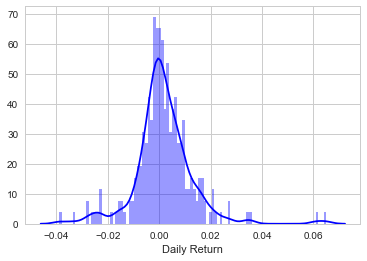

In [87]:
# do the kde and the histogram on the same figure
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color = 'blue')

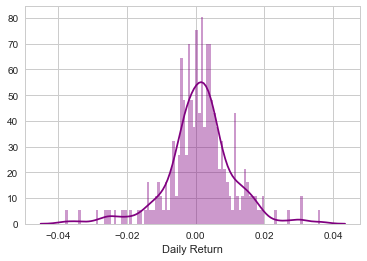

In [89]:
# GOOG:
sns.distplot(GOOG['Daily Return'].dropna(), bins=100, color = 'purple')

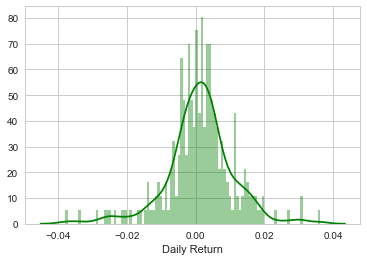

In [92]:
# MSFT
sns.distplot(MSFT['Daily Return'].dropna(), bins=100, color = 'green')

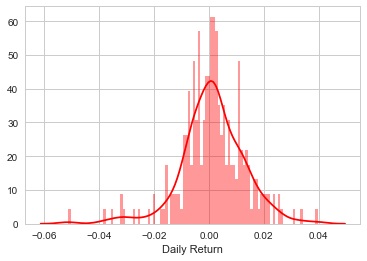

In [93]:
# AMZN
sns.distplot(AMZN['Daily Return'].dropna(), bins = 100, color ='red')

In [94]:
# Grab all the closing prices of the stocks to form a new dataframe
closing_df = web.DataReader(['AAPL','GOOG', 'MSFT', 'AMZN'], 'google', start, end)['Close']

In [95]:
closing_df

AAPL     AMZN    GOOG   MSFT
Date                                      
2016-06-14   97.46   719.30  718.27  49.83
2016-06-15   97.14   714.26  718.92  49.69
2016-06-16   97.55   717.51  710.36  50.39
2016-06-17   95.33   706.39  691.72  50.13
2016-06-20   95.10   714.01  693.71  50.07
2016-06-21   95.91   715.82  695.94  51.19
2016-06-22   95.55   710.60  697.46  50.99
2016-06-23   96.10   722.08  701.87  51.91
2016-06-24   93.40   698.96  675.22  49.83
2016-06-27   92.04   691.36  668.26  48.43
2016-06-28   93.59   707.95  680.04  49.44
2016-06-29   94.40   715.60  684.11  50.54
2016-06-30   95.60   715.62  692.10  51.17
2016-07-01   95.89   725.68  699.21  51.16
2016-07-05   94.99   728.10  694.49  51.17
2016-07-06   95.53   737.61  697.77  51.38
2016-07-07   95.94   736.57  695.36  51.38
2016-07-08   96.68   745.81  705.63  52.30
2016-07-11   96.98   753.78  715.09  52.59
2016-07-12   97.42   748.21  720.64  53.21
2016-07-13   96.87   742.63  716.98  53.51
2016-07-14   98.79   741.20  720.95  53.74
2016-07-15   98.78   735.44  719.85  53.70
2016-07-18   99.83   736.07  733.78  53.96
2016-07-19   99.87   739.95  736.96  53.09
2016-07-20   99.96   745.72  741.19  55.91
2016-07-21   99.43   744.43  738.63  55.80
2016-07-22   98.66   744.86  742.74  56.57
2016-07-25   97.34   739.61  739.77  56.73
2016-07-26   96.67   735.59  738.42  56.76
...            ...      ...     ...    ...
2017-05-03  147.06   941.03  927.04  69.08
2017-05-04  146.53   937.53  931.66  68.81
2017-05-05  148.96   934.15  927.13  69.00
2017-05-08  153.01   949.04  934.30  68.94
2017-05-09  153.99   952.82  932.17  69.04
2017-05-10  153.26   948.95  928.78  69.31
2017-05-11  153.95   947.62  930.60  68.46
2017-05-12  156.10   961.35  932.22  68.38
2017-05-15  155.70   957.97  937.08  68.43
2017-05-16  155.47   966.07  943.00  69.41
2017-05-17  150.25   944.76  919.62  67.48
2017-05-18  152.54   958.49  930.24  67.71
2017-05-19  153.06   959.84  934.01  67.69
2017-05-22  153.99   970.67  941.86  68.45
2017-05-23  153.80   971.54  948.82  68.68
2017-05-24  153.34   980.35  954.96  68.77
2017-05-25  153.87   993.38  969.54  69.62
2017-05-26  153.61   995.78  971.47  69.96
2017-05-30  153.67   996.70  975.88  70.41
2017-05-31  152.76   994.62  964.86  69.84
2017-06-01  153.18   995.95  966.95  70.10
2017-06-02  155.45  1006.73  975.60  71.76
2017-06-05  153.93  1011.34  983.68  72.28
2017-06-06  154.45  1003.00  976.57  72.52
2017-06-07  155.37  1010.07  981.08  72.39
2017-06-08  154.99  1010.27  983.41  71.95
2017-06-09  148.98   978.31  949.83  70.32
2017-06-12  145.42   964.91  942.90  69.78
2017-06-13  146.59   980.79  953.40  70.65
2017-06-14     NaN      NaN  950.76    NaN

[253 rows x 4 columns]

In [96]:
# calculate the percentage change for all
tech_pct = closing_df.pct_change()

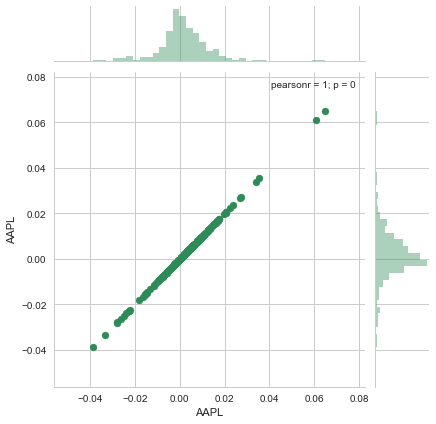

In [97]:
# check correlation between different stocks
# first, compare AAPL to itself to check if we get a linear relationship, if yes, move on
sns.jointplot('AAPL','AAPL', tech_pct, kind = 'scatter', color ='seagreen')

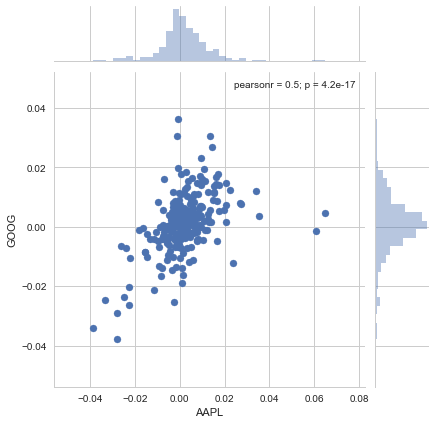

In [98]:
# alright, it works. Let's compare between stocks
sns.jointplot('AAPL', 'GOOG', tech_pct, kind='scatter')

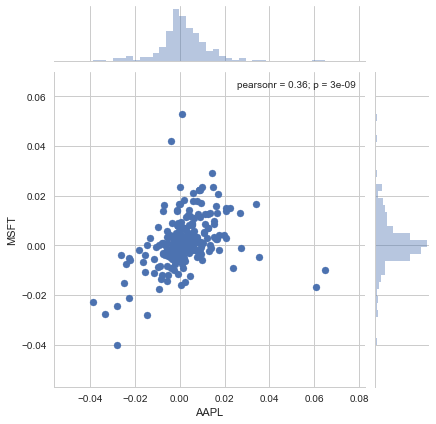

In [99]:
# compare between AAPL and MSFT
sns.jointplot('AAPL', 'MSFT', tech_pct, kind='scatter')

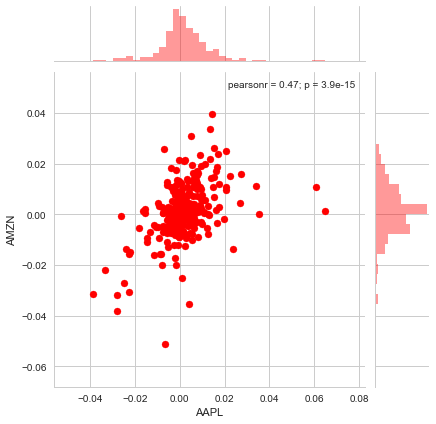

In [100]:
# compare between AAPL and AMZN
sns.jointplot('AAPL', 'AMZN', tech_pct, kind='scatter', color = 'red')

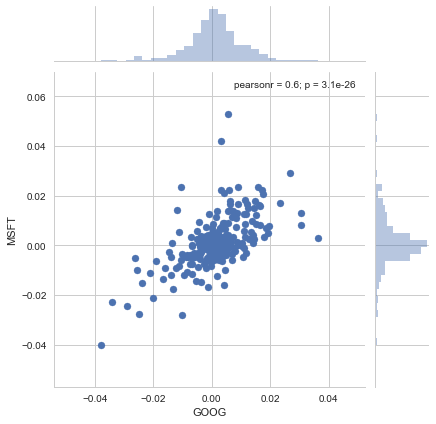

In [101]:
# compare between GOOG and MSFT
sns.jointplot('GOOG', 'MSFT', tech_pct, kind='scatter')

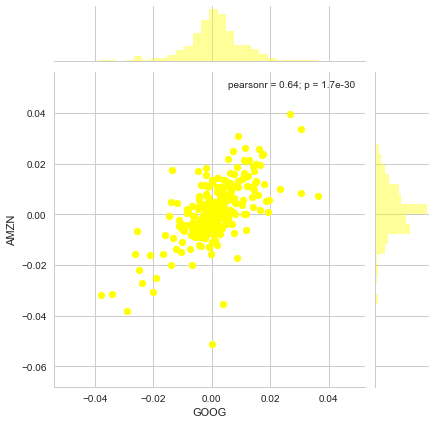

In [102]:
# compare between GOOG and AMZN
sns.jointplot('GOOG', 'AMZN', tech_pct, kind='scatter', color ='yellow')

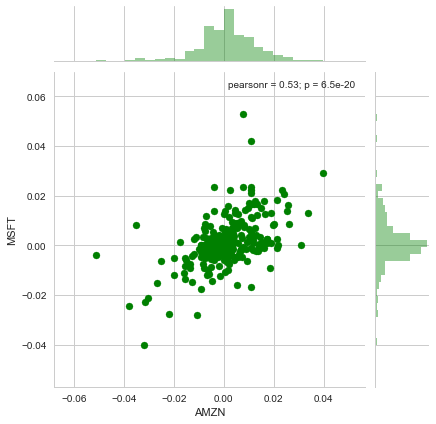

In [106]:
# compare between AMZN and MSFT
sns.jointplot('AMZN', 'MSFT', tech_pct, kind='scatter', color = 'green')

In [109]:
# evaluating the Pearsonr values in the plots gives us a sense how correlated the different groups of data are.
# import the Pearsonr plot as a reference

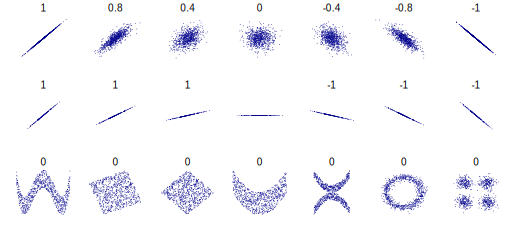

In [108]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

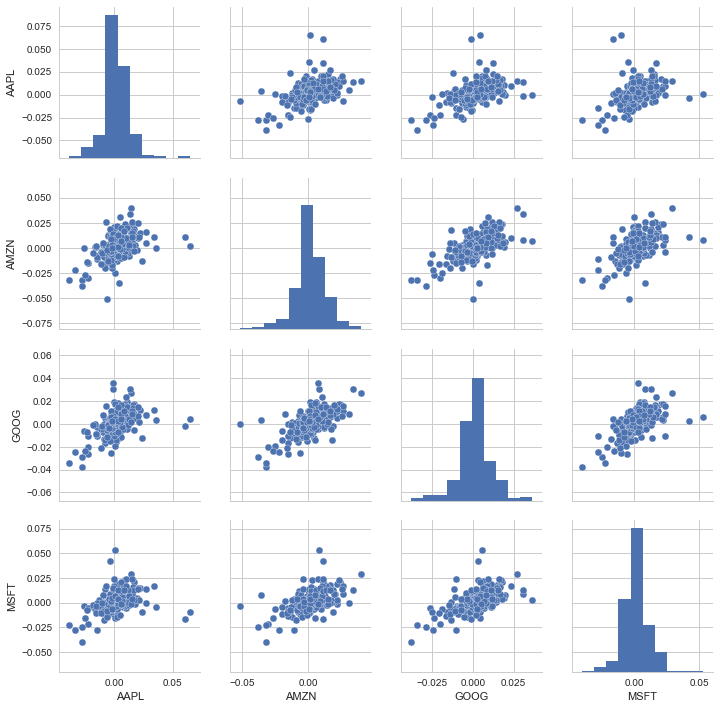

In [112]:
# a very powerful tool in seaborn, pairplot shows the correlation comparision between all series in a dataframe
sns.pairplot(tech_pct.dropna())

In [114]:
# use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, 
# and the lower triangle

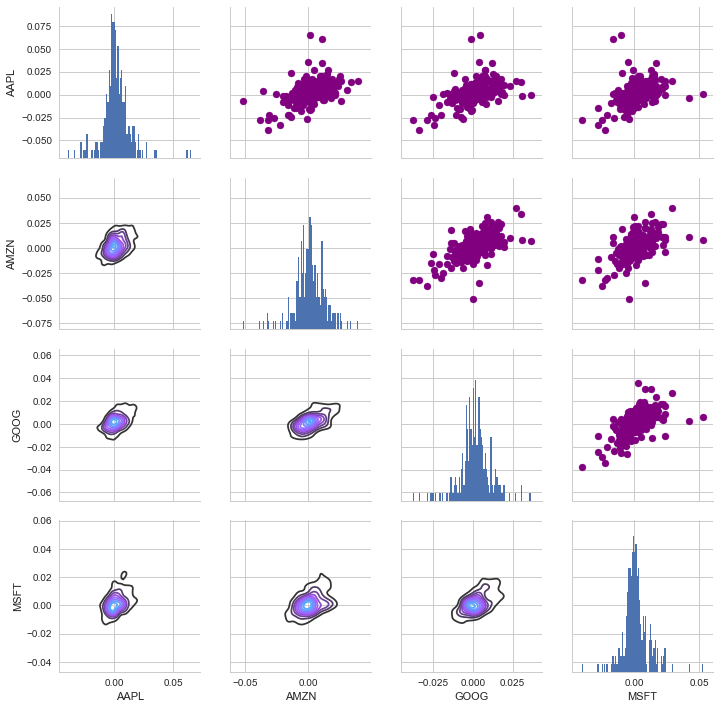

In [117]:
returns_fig = sns.PairGrid(tech_pct.dropna())
# diagonal
returns_fig.map_diag(plt.hist, bins = 100)
# upper triangle
returns_fig.map_upper(plt.scatter, color = 'purple')
# lower triangle
returns_fig.map_lower(sns.kdeplot, cmap ='cool_d')

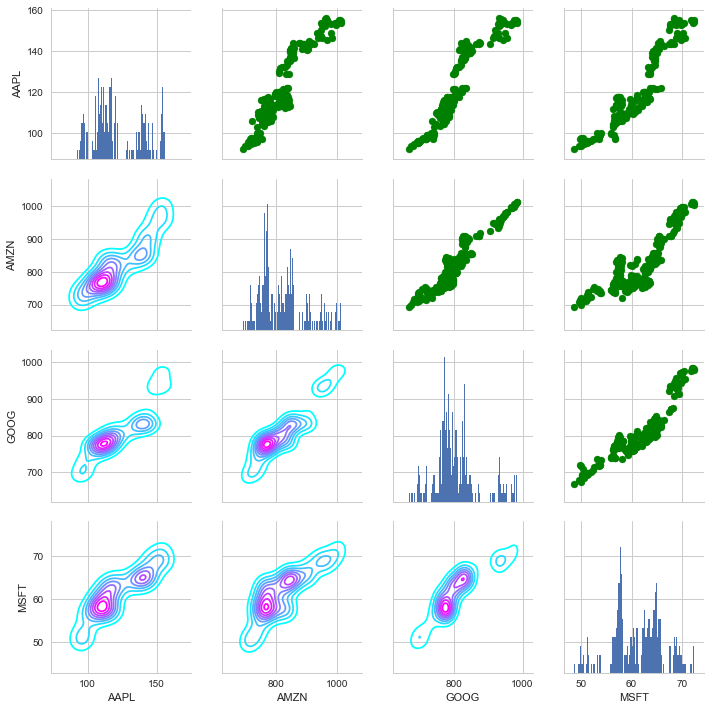

In [118]:
# do the same analysis for closing_df 
returns_fig = sns.PairGrid(closing_df.dropna())
# diagonal
returns_fig.map_diag(plt.hist, bins = 100)
# upper triangle
returns_fig.map_upper(plt.scatter, color = 'green')
# lower triangle
returns_fig.map_lower(sns.kdeplot, cmap ='cool')

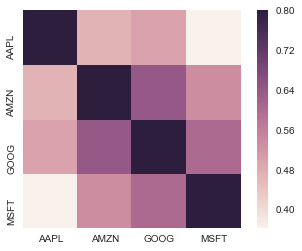

In [121]:
# use the seaborn correlation matrix and heatmap to get the numerical values: (diagonal correlation matrix)
corrmat = tech_pct.dropna().corr()
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
# it is seen that AMZN and GOOG has a strong relationship

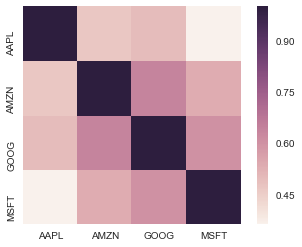

In [129]:
corrmat = tech_pct.dropna().corr()
sns.heatmap(corrmat, square=True)

### Risk Analysis

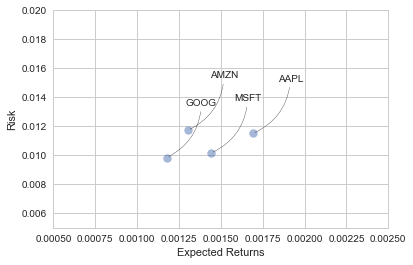

In [143]:
# comparing the expected return with the standard deviation of the daily return
tech_clean = tech_pct.dropna()
area = np.pi*20

plt.scatter(tech_clean.mean(), tech_clean.std(), alpha = 0.5, s = area)

plt.xlim([0.0005,0.0025])
plt.ylim([0.005, 0.020])

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(tech_clean.columns, tech_clean.mean(), tech_clean.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

### Value at Risk

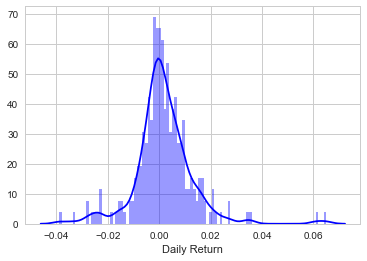

In [144]:
# value at risk (VaR): the amount of money one can expect to lose, a.k.a. putting at risk for a given confidence interval
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color = 'blue')

In [145]:
# use 0.05 empirial quantile (分位数):
tech_clean['AAPL'].quantile(0.05)

-0.015652575573914418

In [146]:
# The 0.05 empirical quantile of daily returns is at -0.016. That means that with 95% confidence, 
# the worst daily loss will not exceed 1.6%. If we have a 1 million dollar investment, our one-day 5% VaR is
# 0.016 * 1,000,000 = $16,000.

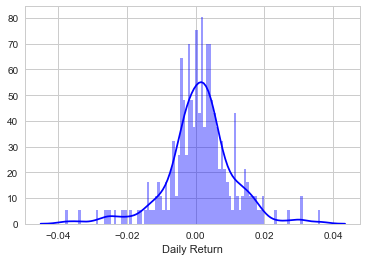

In [147]:
# do the same analysis for GOOG
sns.distplot(GOOG['Daily Return'].dropna(), bins=100, color = 'blue')

In [148]:
# use 0.05 empirial quantile (分位数):
tech_clean['GOOG'].quantile(0.05)

-0.01424550323682533

In [149]:
# The 0.05 empirical quantile of daily returns is at -0.014. That means that with 95% confidence, 
# the worst daily loss will not exceed 1.4%. If we have a 1 million dollar investment, our one-day 5% VaR is
# 0.014 * 1,000,000 = $14,000.

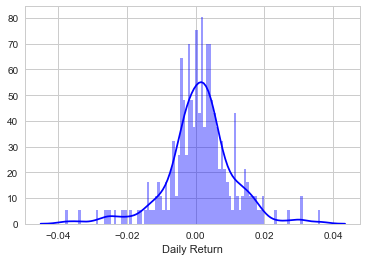

In [150]:
# do the same analysis for MSFT
sns.distplot(MSFT['Daily Return'].dropna(), bins=100, color = 'blue')

In [151]:
# use 0.05 empirial quantile (分位数):
tech_clean['MSFT'].quantile(0.05)

-0.012925127154864047

In [152]:
# The 0.05 empirical quantile of daily returns is at -0.013. That means that with 95% confidence, 
# the worst daily loss will not exceed 1.3%. If we have a 1 million dollar investment, our one-day 5% VaR is
# 0.013 * 1,000,000 = $13,000.

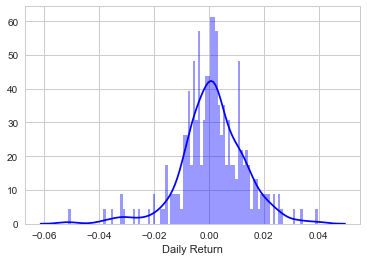

In [153]:
# do the same analysis for AMZN
sns.distplot(AMZN['Daily Return'].dropna(), bins=100, color = 'blue')

In [154]:
# use 0.05 empirial quantile (分位数):
tech_clean['AMZN'].quantile(0.05)

-0.015869980257258443

In [155]:
# The 0.05 empirical quantile of daily returns is at -0.016. That means that with 95% confidence, 
# the worst daily loss will not exceed 1.6%. If we have a 1 million dollar investment, our one-day 5% VaR is
# 0.016 * 1,000,000 = $16,000.

In [156]:
# now try to calculate VaR using Monte Carlo method
# Monte Carlo analysis runs many trials with random market conditions, and then calculates portfolio losses for each trial. 
# After this, all these simulations are aggragated to establish how risky the stock is.

In [157]:
# stock price = drift (predicted) + shock (random movement)

In [158]:
# Use the geometric Brownian motion (GBM), which is technically known as a Markov process. 
# This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of 
# the efficient market hypothesis (EMH): past price information is already incorporated and 
# the next price movement is "conditionally independent" of past price movements.

In [159]:
# By simulating this series of steps of drift and shock thousands of times, 
# we can begin to do a simulation of where we might expect the stock price to be.

In [160]:
# Set up the time horizon
days = 365

# thus the delta
dt = 1/days

# Now grab the mu (drift) from the expected return data we got for AAPL
mu = tech_clean.mean()['AAPL']

# Now grab the volatility of the stock from the std() of the average return
sigma = tech_clean.std()['AAPL']

In [164]:
# create a function that takes in the starting price and number of days, and uses the sigma and mu
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation, mu, sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Define Shock and Drift arrays
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [162]:
# get the start price for AAPL: 97.32
AAPL.head()

Open   High    Low  Close    Volume  Moving_Average for  20ays  \
Date                                                                          
2016-06-14  97.32  98.48  96.75  97.46  31931944                        NaN   
2016-06-15  97.82  98.41  97.03  97.14  29445227                        NaN   
2016-06-16  96.45  97.75  96.07  97.55  31326815                        NaN   
2016-06-17  96.62  96.65  95.30  95.33  61008219                        NaN   
2016-06-20  96.00  96.57  95.03  95.10  34411901                        NaN   

            Moving_Average for  50ays  Moving_Average for  100ays  \
Date                                                                
2016-06-14                        NaN                         NaN   
2016-06-15                        NaN                         NaN   
2016-06-16                        NaN                         NaN   
2016-06-17                        NaN                         NaN   
2016-06-20                        NaN                         NaN   

            Moving_Average for 20 days  Moving_Average for 50 days  \
Date                                                                 
2016-06-14                         NaN                         NaN   
2016-06-15                         NaN                         NaN   
2016-06-16                         NaN                         NaN   
2016-06-17                         NaN                         NaN   
2016-06-20                         NaN                         NaN   

            Moving_Average for 100 days  Daily Return  
Date                                                   
2016-06-14                          NaN           NaN  
2016-06-15                          NaN     -0.003283  
2016-06-16                          NaN      0.004221  
2016-06-17                          NaN     -0.022758  
2016-06-20                          NaN     -0.002413

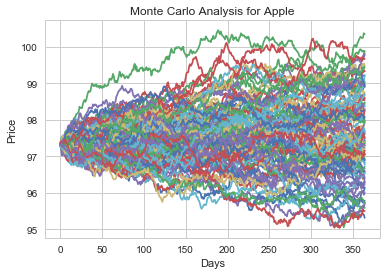

In [165]:
# run the random simulation for 100 times
start_price = 97.32

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [166]:
# get the start price for GOOG: 718.27
GOOG.head()

Open    High     Low   Close   Volume  \
Date                                                  
2016-06-14  716.48  722.47  713.12  718.27  1306065   
2016-06-15  719.00  722.98  717.31  718.92  1214517   
2016-06-16  714.91  716.65  703.26  710.36  1982471   
2016-06-17  708.65  708.82  688.45  691.72  3402357   
2016-06-20  698.77  702.48  693.41  693.71  2082538   

            Moving_Average for 20 days  Moving_Average for 50 days  \
Date                                                                 
2016-06-14                         NaN                         NaN   
2016-06-15                         NaN                         NaN   
2016-06-16                         NaN                         NaN   
2016-06-17                         NaN                         NaN   
2016-06-20                         NaN                         NaN   

            Moving_Average for 100 days  Daily Return  
Date                                                   
2016-06-14                          NaN           NaN  
2016-06-15                          NaN      0.000905  
2016-06-16                          NaN     -0.011907  
2016-06-17                          NaN     -0.026240  
2016-06-20                          NaN      0.002877

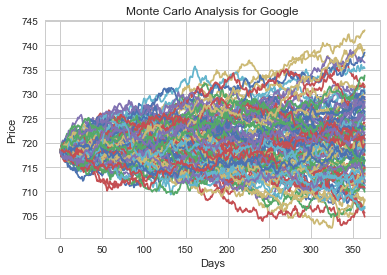

In [167]:
# run the random simulation for 100 times
start_price = 718.27

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [168]:
# get the start price for MSFT: 49.90
MSFT.head()

Open   High    Low  Close    Volume  Moving_Average for 20 days  \
Date                                                                           
2016-06-14  49.90  50.10  49.57  49.83  42577106                         NaN   
2016-06-15  49.78  50.12  49.69  49.69  33757639                         NaN   
2016-06-16  49.52  50.47  49.51  50.39  31188605                         NaN   
2016-06-17  50.41  50.43  49.82  50.13  45710516                         NaN   
2016-06-20  50.64  50.83  50.03  50.07  35607946                         NaN   

            Moving_Average for 50 days  Moving_Average for 100 days  \
Date                                                                  
2016-06-14                         NaN                          NaN   
2016-06-15                         NaN                          NaN   
2016-06-16                         NaN                          NaN   
2016-06-17                         NaN                          NaN   
2016-06-20                         NaN                          NaN   

            Daily Return  
Date                      
2016-06-14           NaN  
2016-06-15      0.000905  
2016-06-16     -0.011907  
2016-06-17     -0.026240  
2016-06-20      0.002877

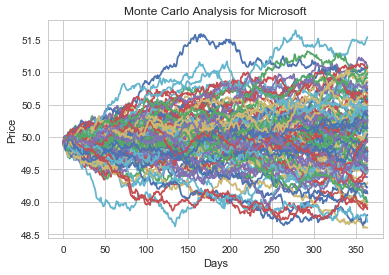

In [169]:
# run the random simulation for 100 times
start_price = 49.90

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

In [170]:
# get the start price for AMZN: 712.33
AMZN.head()

Open    High     Low   Close   Volume  \
Date                                                  
2016-06-14  712.33  720.80  712.27  719.30  2506922   
2016-06-15  722.00  722.56  713.35  714.26  2709447   
2016-06-16  712.05  718.00  705.30  717.51  3097961   
2016-06-17  718.19  718.20  699.18  706.39  5897788   
2016-06-20  713.50  721.31  710.81  714.01  3677162   

            Moving_Average for 20 days  Moving_Average for 50 days  \
Date                                                                 
2016-06-14                         NaN                         NaN   
2016-06-15                         NaN                         NaN   
2016-06-16                         NaN                         NaN   
2016-06-17                         NaN                         NaN   
2016-06-20                         NaN                         NaN   

            Moving_Average for 100 days  Daily Return  
Date                                                   
2016-06-14                          NaN           NaN  
2016-06-15                          NaN     -0.007007  
2016-06-16                          NaN      0.004550  
2016-06-17                          NaN     -0.015498  
2016-06-20                          NaN      0.010787

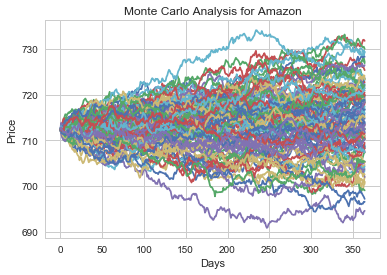

In [171]:
# run the random simulation for 100 times
start_price = 712.33

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [172]:
# get the end results (at day = 365) for much larger runs

# Set a large numebr of runs
runs = 10000

start_price = 97.32

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

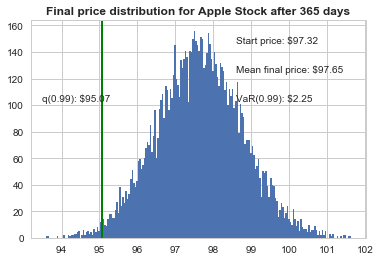

In [175]:
# Now define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=2, color='g')

# Title
plt.title("Final price distribution for Apple Stock after %s days" % days, weight='bold');

In [174]:
# the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Apple stock, 
# which looks to be $2.25 for every investment of 97.32 (the price of one inital Apple stock).
# This basically menas for every initial stock you purchase your putting about $2.25 at risk 99% of the time 
# from our Monte Carlo Simulation.

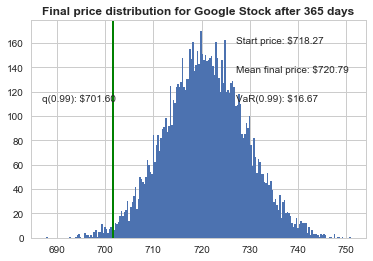

In [176]:
-

In [177]:
# the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, 
# which looks to be $16.67 for every investment of 718.27 (the price of one inital Google stock).
# This basically menas for every initial stock you purchase your putting about $16.67 at risk 99% of the time 
# from our Monte Carlo Simulation.

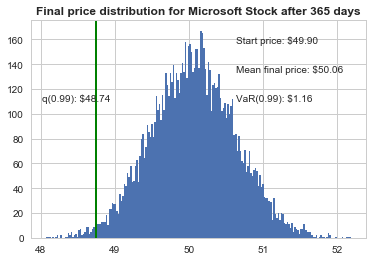

In [178]:
# Now get the results for Microsoft

# Set a large numebr of runs
runs = 10000

start_price = 49.90

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];
    
# Now define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=2, color='g')

# Title
plt.title("Final price distribution for Microsoft Stock after %s days" % days, weight='bold');

In [179]:
# the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, 
# which looks to be $1.16 for every investment of 49.90 (the price of one inital Microsoft stock).
# This basically menas for every initial stock you purchase your putting about $1.16 at risk 99% of the time 
# from our Monte Carlo Simulation.

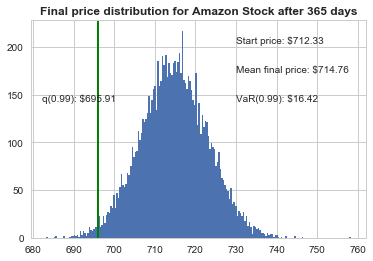

In [180]:
# Now get the results for Amazon

# Set a large numebr of runs
runs = 10000

start_price = 712.33

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];
    
# Now define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=2, color='g')

# Title
plt.title("Final price distribution for Amazon Stock after %s days" % days, weight='bold');

In [181]:
# the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Amazon stock, 
# which looks to be $16.42 for every investment of 49.90 (the price of one inital Amazon stock).
# This basically menas for every initial stock you purchase your putting about $16.42 at risk 99% of the time 
# from our Monte Carlo Simulation.